#### 데스크탑 자동화
- pip install opencv-python
- pip install pyautogui (마우스, 키보드 조작, 윈도우)

In [2]:
import pyautogui as p

# 해상도 확인
size = p.size()
print(size)
print(size[0])

Size(width=1920, height=1080)
1920


In [3]:
# 마우스 조작

# 마우스 좌표 가져오기
position = p.position()
print(position)
print(position.x, position.y)

Point(x=649, y=540)
649 540


In [4]:
# 마우스 이동 : moveTo(x,y,움직이는 시간) - 절대좌표
p.moveTo(100,100,0.5)
p.moveTo(200,200,0.5)
p.moveTo(300,300,0.5)

In [5]:
# 마우스 이동 : move(x,y,움직이는 시간), moveRel() - 상대좌표
p.moveTo(100,100,0.5)
p.move(300,300,0.25)
print(p.position())
p.move(100,100,0.25)

Point(x=400, y=400)


In [6]:
# 현재 위치에서 클릭
p.click()

# p.click(1970,14) : 해당좌표에서 클릭

In [7]:
p.sleep(3)
print(p.position())

Point(x=822, y=636)


In [8]:
p.click(2008,26,1)

In [12]:
# 더블클릭
p.click(clicks=2)

In [15]:
p.doubleClick()

In [16]:
# 오른쪽 클릭
p.rightClick()

In [17]:
# drag() : 상대위치로 drag

p.moveTo(x=3570, y=55)
p.drag(150,0,0.25) 

In [18]:
# dragTo() : 절대위치로 drag

p.moveTo(x=3570, y=55)
p.dragTo(3470,100) 

In [19]:
# 양수인 경우 : 위, 음수인 경우 : 아래
# p.scroll(1000)
# p.scroll(-1000)

p.moveTo(x=3758, y=259)
p.sleep(2)
p.scroll(-1000)

In [39]:
p.mouseInfo()

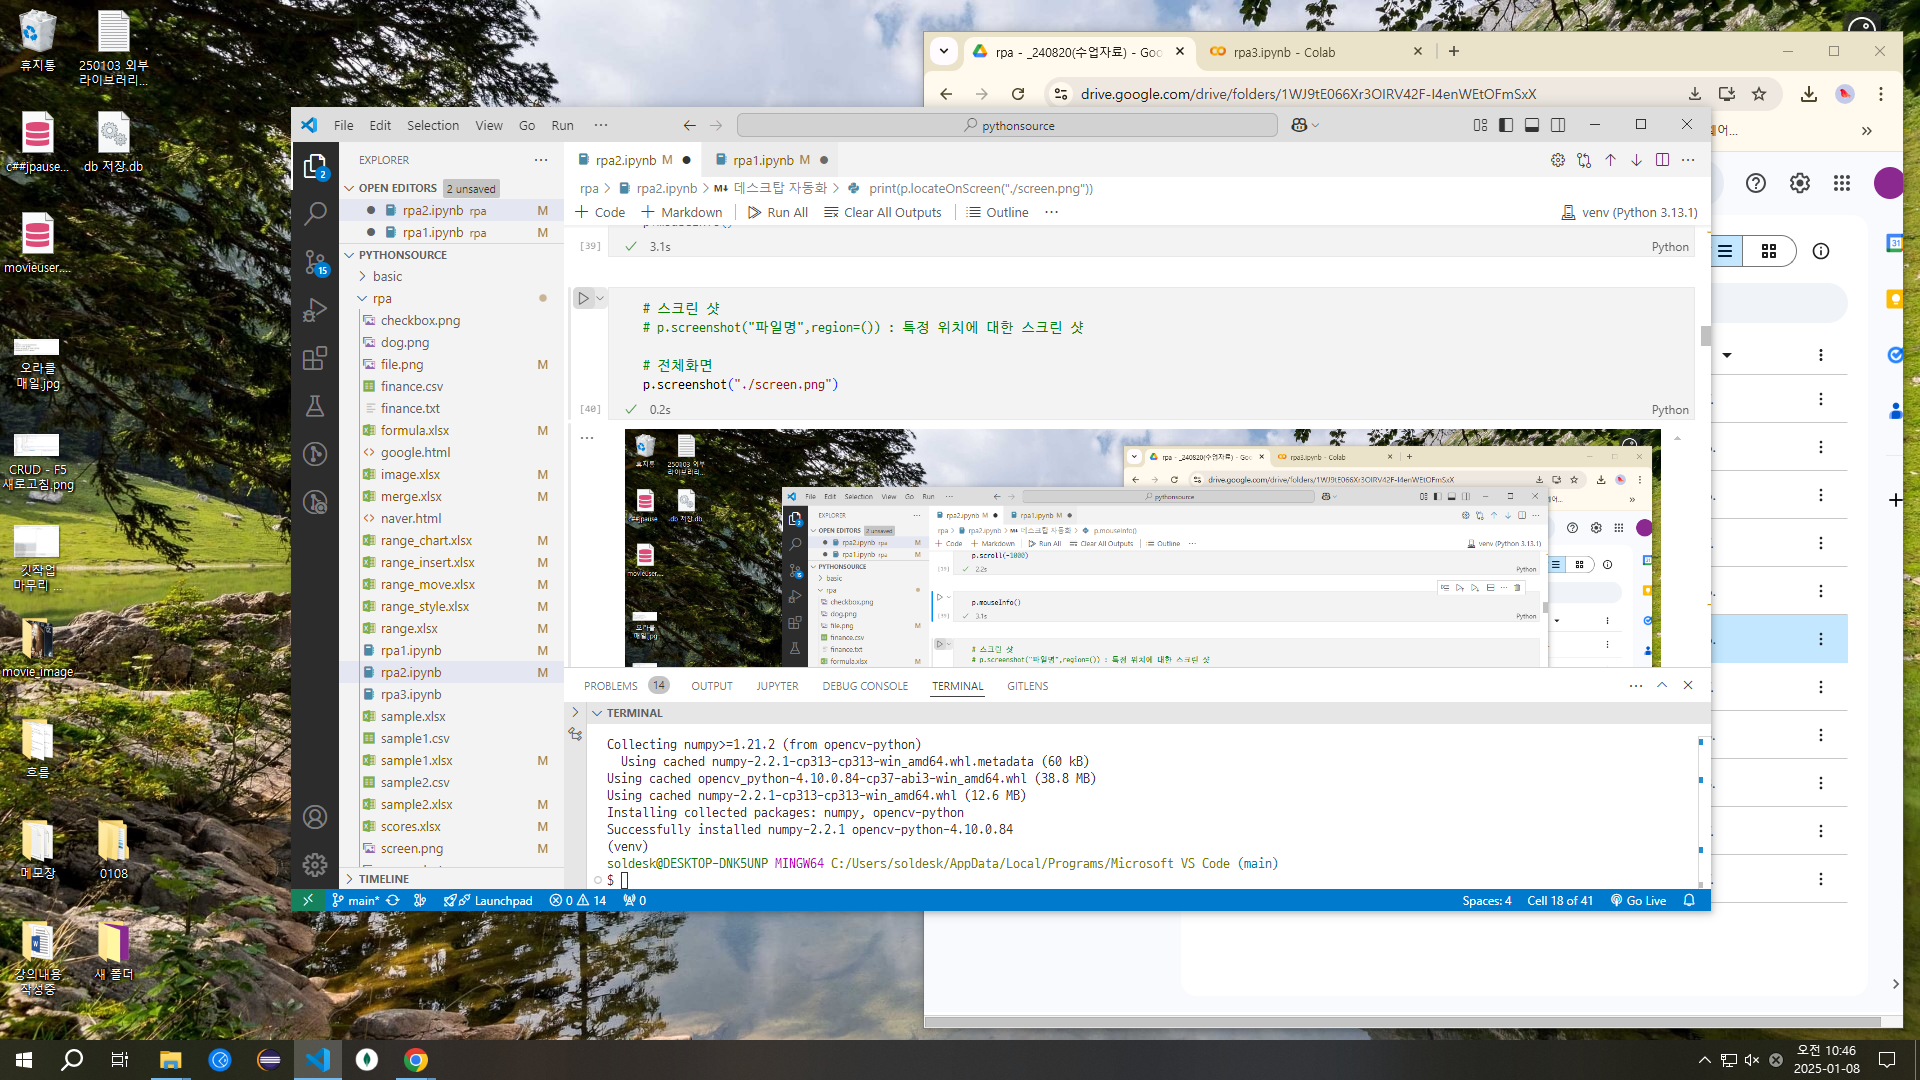

In [44]:
# 스크린 샷
# p.screenshot("파일명",region=()) : 특정 위치에 대한 스크린 샷

# 전체화면
p.screenshot("./screen.png")

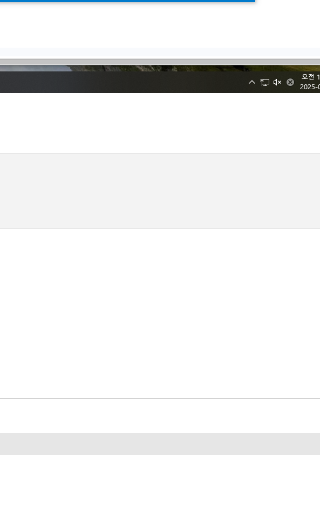

In [45]:
# region(left, top, witdh, height)
p.screenshot("./screen.png",region=(1293,269,320,532))

In [46]:
print(p.locateOnScreen("./screen.png"))

ImageNotFoundException: 

In [47]:
# vscode File 메뉴 캡쳐
p.screenshot("./file.png", region=(58,12,40,25))

p.sleep(1)

file_locate = p.locateOnScreen("./file.png")
print(file_locate)

Box(left=np.int64(58), top=np.int64(12), width=40, height=25)


In [48]:
file_locate = p.locateOnScreen("./file.png",confidence=0.9)
p.click(file_locate)

In [49]:
# locateAllOnScreen()
p.sleep(1)
p.screenshot("./checkbox.png", region=(1538,370,15,15))


In [50]:
for i in p.locateAllOnScreen("./checkbox.png"):
    print(i)
    p.click(i)

Box(left=np.int64(1538), top=np.int64(270), width=15, height=15)
Box(left=np.int64(625), top=np.int64(400), width=15, height=15)


In [51]:
# 윈도우
# 현재 활성화된 창
window = p.getActiveWindow()
print(window)
print(window.title)
print(window.top, window.left, window.width, window.height)

<Win32Window left="291", top="107", width="1420", height="804", title="● rpa2.ipynb - pythonsource - Visual Studio Code">
● rpa2.ipynb - pythonsource - Visual Studio Code
107 291 1420 804


In [52]:
for w in p.getAllWindows():
    print(w)

<Win32Window left="0", top="1040", width="1920", height="40", title="">
<Win32Window left="291", top="107", width="1420", height="804", title="● rpa2.ipynb - pythonsource - Visual Studio Code">
<Win32Window left="916", top="31", width="995", height="1005", title="rpa - _240820(수업자료) - Google Drive - Chrome">
<Win32Window left="-32000", top="-32000", width="160", height="28", title="ChatGPT - Chrome">
<Win32Window left="-32000", top="-32000", width="160", height="28", title="rpa">
<Win32Window left="-32000", top="-32000", width="160", height="28", title="다운로드">
<Win32Window left="-32000", top="-32000", width="160", height="28", title="pythonsource">
<Win32Window left="-32000", top="-32000", width="160", height="28", title="바탕 화면">
<Win32Window left="-32000", top="-32000", width="160", height="28", title="바탕 화면">
<Win32Window left="-32000", top="-32000", width="160", height="28", title="pythonsource">
<Win32Window left="0", top="1", width="1200", height="932", title="설정">
<Win32Window le

In [55]:
# 특정 창 가져오기
for w in p.getWindowsWithTitle("제목 없음"):
    print(w)

<Win32Window left="1373", top="444", width="513", height="393", title="제목 없음 - Windows 메모장">


In [56]:
w = p.getWindowsWithTitle("제목 없음")[0]
if not w.isActive:
    w.activate()

In [57]:
if not w.isMaximized:
    w.maximize()

In [58]:
if not w.isMinimized:
    w.minimize()

In [60]:
# 키보드

w = p.getWindowsWithTitle("제목 없음")[0]
w.activate()

p.write("write")

In [61]:
w = p.getWindowsWithTitle("제목 없음")[0]
w.activate()
p.write("pyautogui", interval=0.25)

In [62]:
w = p.getWindowsWithTitle("제목 없음")[0]
w.activate()
p.write("안녕하세요", interval=0.25) # 한글 안됨

In [63]:
import pyperclip

w = p.getWindowsWithTitle("제목 없음")[0]
w.activate()
pyperclip.copy("안녕하세요") # 클립보드
p.hotkey("ctrl","v") # ctrl + v

In [64]:
def hangul_write(text):
    pyperclip.copy(text)
    p.hotkey("ctrl","v")

In [65]:
w = p.getWindowsWithTitle("제목 없음")[0]
w.activate()
hangul_write("반갑습니다")
hangul_write("hello")

In [66]:
w = p.getWindowsWithTitle("제목 없음")[0]
w.activate()

p.hotkey("ctrl","a")

# ctrl + A 키보드 누르는 작없
# p.keyDown("ctrl")
# p.keyDown("a")
# ctrl + A 키보드에서 손 떼기
# p.keyUp("a")
# p.keyUp("ctrl")

In [67]:
# 작업관리자 띄우기
p.hotkey("ctrl","shift","esc")

In [68]:
p.alert("자동화 수행에 실패했습니다.")

'OK'

In [69]:
p.alert("자동화 수행에 실패했습니다.",title="확인")

'OK'

In [70]:
result = p.confirm("계속 진행하시겠습니까?", title="경고")
print(result)

Cancel


In [71]:
p.prompt("아이디를 입력해 주세요",title="로그인",default="TEST")

'TEST'

In [72]:
p.password("패스워드를 입력해 주세요",title="비밀번호")

'12345'